In [388]:
## Michael Janke - Assignment 2
## Import Modules
import numpy as np
import pandas as pd

In [3]:
## Read train term matrix (5500 terms, 800 documents)
## Term frequency matrix where each column appears to be a document.
trainMatrixModified = pd.read_table('trainMatrixModified.txt', sep='\t', header=None)

## Transpose Matrix
trainMatrixModified = trainMatrixModified.T

In [5]:
trainMatrixModified.head(5)

,0,1,2,3,4,5,6,7,8,9,...,5490,5491,5492,5493,5494,5495,5496,5497,5498,5499
0,2.0,2.0,2.0,1.0,8.0,6.0,2.0,8.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
## Read test term matrix (5500 terms, 200 documents)
## Term frequency matrix where each column appears to be a document.
testMatrixModified = pd.read_table('testMatrixModified.txt', sep='\t', header=None)

## Transpose Matrix
testMatrixModified = testMatrixModified.T

In [7]:
testMatrixModified.head(5)

,0,1,2,3,4,5,6,7,8,9,...,5490,5491,5492,5493,5494,5495,5496,5497,5498,5499
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
## Read train and test classes
trainClasses = pd.read_table('trainClasses.txt', sep='\t', header=None)
trainClasses.head(5)

,0,1
0,0,0
1,1,1
2,2,0
3,3,1
4,4,0


In [10]:
testClasses = pd.read_table('testClasses.txt', sep='\t', header=None)
testClasses.head(5)

,0,1
0,0,1
1,1,0
2,2,0
3,3,1
4,4,1


In [11]:
## Read modified terms
modifiedTerms = pd.read_table('modifiedTerms.txt', sep='\t', header=None)
modifiedTerms

,0
0,david
1,rex
2,wood
3,subject
4,call
5,librari
6,creat
7,widget
8,multipl
9,time


In [12]:
## Create data frames to arrays
trainMatrixModifiedArray = np.array(trainMatrixModified)
testMatrixModifiedArray = np.array(testMatrixModified)

In [13]:
## Define a function for kNN search
## x = instance to be classified
## D = data matrix
## L = labels
## K = number of neighbors
## measure = euclidean or cosine (0 or 1)

def knn_search(x, D, L, K, measure):
    """ find K nearest neighbours of data point x among D """
    if measure == 0:
        # euclidean distances from the other points
        dists = np.sqrt(((D - x)**2).sum(axis=1))
    elif measure == 1:
        D_norm = np.array([np.linalg.norm(D[i]) for i in range(len(D))])
        x_norm = np.linalg.norm(x)
        sims = np.dot(D,x)/(D_norm * x_norm) ## cosine similarity
        dists = 1 - sims
    idx = np.argsort(dists) # sorting

    # return the indexes of K nearest neighbors
    return idx[:K], sorted(dists)[:K], round(np.array(L.iloc[:,[1]].T[idx[:K]]).mean())

In [14]:
## instance to be classified; read from testMatrixModified

## set index
i = 7

x = np.array(testMatrixModified.iloc[i])
x

array([0., 0., 0., ..., 0., 0., 0.])

In [15]:
# Finding the k=15 nearest neighbors using inverse of Cosine similarity as a distance metric
neigh_idx, distances, predictedClass = knn_search(x, trainMatrixModifiedArray, trainClasses, 15, 1)

In [16]:
## Index 
neigh_idx

array([602, 770, 354, 116, 715, 169, 448, 774, 416, 592, 182,  10, 541,
       290, 783], dtype=int64)

In [17]:
distances

[0.6745277225479404,
 0.674551922129925,
 0.7020873852283833,
 0.7053674186468871,
 0.7182702692756072,
 0.7199100801597353,
 0.7252991175890636,
 0.7269134364593515,
 0.7332301129567425,
 0.7332660050834415,
 0.7399800858665841,
 0.7411493338612172,
 0.7418836942593483,
 0.7424938286930244,
 0.7435803775182408]

In [18]:
trainMatrixModifiedArray[neigh_idx]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
predictedClass

1.0

In [20]:
## actual class
testClasses.iloc[[i],[1]]

,1
7,1


In [21]:
predictedClass == testClasses.iloc[[i],[1]]

,1
7,True


In [22]:
# Finding the k=15 nearest neighbors using euclidean distance metric
neigh_idx2, distances, predictedClass = knn_search(x, trainMatrixModifiedArray, trainClasses, 15, 0)

In [23]:
## Index 
neigh_idx2

array([798, 757, 743,  38, 224, 706, 398, 119, 711,  69, 464, 615, 751,
       342, 551], dtype=int64)

In [24]:
predictedClass

0.0

In [25]:
## actual class
testClasses.iloc[[i],[1]]

,1
7,1


In [26]:
predictedClass == testClasses.iloc[[i],[1]]

,1
7,False


In [27]:
np.array(trainClasses.iloc[:,[1]].T[neigh_idx])

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=int64)

In [28]:
np.array(trainClasses.iloc[:,[1]].T[neigh_idx2])

array([[1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0]], dtype=int64)

In [29]:
## Check length
## This is a test block for learning. Remove later
len(testMatrixModified)

count = len(testMatrixModified)
i = 0
    
while i < count:
    print(i)
    i += 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [30]:
## 1.b function to return accuracy

## T = test matrix
## D = train matrix (array)
## L = labels (matrix)
## K = number of neighbors
## measure = euclidean or cosine (0 or 1)

def knn_accuracy(T, D, L, K, measure):

    matches = 0.00
    count = len(T)
    i = 0
    
    while i < count:
        
        neigh_idx, distances, predictedClass = knn_search(np.array(T.iloc[i]), D, L, K, measure)
        
        isMatch = predictedClass == L.iloc[[i],[1]]

        if isMatch.bool() == True:
            matches += 1
            
        i += 1
    
    # return accuracy measure
    return matches / count

In [31]:
knn_accuracy(testMatrixModified, trainMatrixModifiedArray, trainClasses, 15, 1)

0.495

In [32]:
knn_accuracy(testMatrixModified, trainMatrixModifiedArray, trainClasses, 15, 0)

0.465

In [300]:
knn_accuracy(testMatrixModified, trainMatrixModifiedArray, trainClasses, 5, 1)

0.5

In [301]:
knn_accuracy(testMatrixModified, trainMatrixModifiedArray, trainClasses, 5, 0)

0.495

In [302]:
knn_accuracy(testMatrixModified, trainMatrixModifiedArray, trainClasses, 9, 1)

0.505

In [303]:
knn_accuracy(testMatrixModified, trainMatrixModifiedArray, trainClasses, 9, 0)

0.48

In [350]:
## Graph the euclidean accuracy for K 1 - 20
euclideanDF = pd.DataFrame(columns=['K', 'accuracy'])

i = 1
    
while i <= 20:
    acc = knn_accuracy(testMatrixModified, trainMatrixModifiedArray, trainClasses, i, 0)
    print(i, acc)
    euclideanDF.loc[len(euclideanDF)] = [i, acc]
    i += 1

(1, 0.47)
(2, 0.495)
(3, 0.51)
(4, 0.48)
(5, 0.495)
(6, 0.495)
(7, 0.485)
(8, 0.5)
(9, 0.48)
(10, 0.46)
(11, 0.465)
(12, 0.46)
(13, 0.465)
(14, 0.48)
(15, 0.465)
(16, 0.46)
(17, 0.46)
(18, 0.475)
(19, 0.49)
(20, 0.495)


In [351]:
euclideanDF

,K,accuracy
0,1.0,0.470
1,2.0,0.495
2,3.0,0.510
3,4.0,0.480
4,5.0,0.495
5,6.0,0.495
6,7.0,0.485
7,8.0,0.500
8,9.0,0.480
9,10.0,0.460


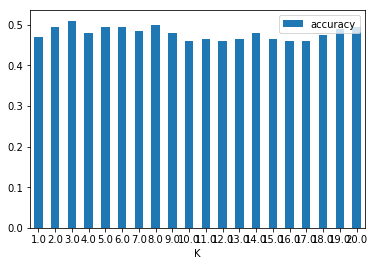

In [51]:
euclideanDF.plot.bar(x='K', rot=0)

In [360]:
## Graph the cosine accuracy for K 1 - 20
cosineDF = pd.DataFrame(columns=['K', 'accuracy'])

i = 1
    
while i <= 20:
    acc = knn_accuracy(testMatrixModified, trainMatrixModifiedArray, trainClasses, i, 1)
    print(i, acc)
    cosineDF.loc[len(cosineDF)] = [i, acc]
    i += 1

(1, 0.475)
(2, 0.47)
(3, 0.49)
(4, 0.49)
(5, 0.5)
(6, 0.495)
(7, 0.5)
(8, 0.505)
(9, 0.505)
(10, 0.495)
(11, 0.5)
(12, 0.5)
(13, 0.5)
(14, 0.495)
(15, 0.495)
(16, 0.495)
(17, 0.495)
(18, 0.495)
(19, 0.495)
(20, 0.495)


In [356]:
cosineDF

,K,accuracy
0,1.0,0.475
1,2.0,0.470
2,3.0,0.490
3,4.0,0.490
4,5.0,0.500
5,6.0,0.495
6,7.0,0.500
7,8.0,0.505
8,9.0,0.505
9,10.0,0.495


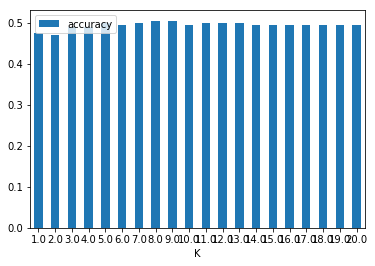

In [54]:
cosineDF.plot.bar(x='K', rot=0)

In [341]:
## 1.d

## Sum term count across all training documents
termFreq = trainMatrixModified.sum(axis=0)
#print termFreq

termDocFreq = trainMatrixModified.astype(bool).sum(axis=0)
#print termDocFreq

## Calculate IDF

NDocs = trainMatrixModified.shape[0]

#termFreqsWeighted = NDocs/termDocFreq

idf = np.log(NDocs/termDocFreq)

print(idf)

0       2.772589
1       4.738702
2       4.382027
3       0.000000
4       2.002481
5       3.218876
6       2.733368
7       2.834464
8       3.388775
9       1.391307
10      2.641560
11      3.047026
12      2.162823
13      2.141317
14      2.049883
15      2.573738
16      2.184802
17      3.912023
18      2.099644
19      5.298317
20      1.817077
21      2.641560
22      1.707878
23      2.407946
24      3.388775
25      2.109901
26      3.158251
27      4.119662
28      2.813411
29      4.605170
          ...   
5470    5.585999
5471    5.298317
5472    5.991465
5473    5.585999
5474    5.585999
5475    5.585999
5476    5.585999
5477    5.585999
5478    5.991465
5479    5.298317
5480    5.585999
5481    5.991465
5482    5.991465
5483    5.585999
5484    5.585999
5485    5.585999
5486    5.585999
5487    5.991465
5488    5.991465
5489    5.991465
5490    5.991465
5491    5.991465
5492    6.684612
5493    5.991465
5494    5.585999
5495    5.585999
5496    5.585999
5497    5.9914

In [342]:
trainMatrixModified.head(5)

,0,1,2,3,4,5,6,7,8,9,...,5490,5491,5492,5493,5494,5495,5496,5497,5498,5499
0,2.0,2.0,2.0,1.0,8.0,6.0,2.0,8.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [344]:
trainMatrixWeighted = trainMatrixModified * idf
trainMatrixWeighted.head(5)

,0,1,2,3,4,5,6,7,8,9,...,5490,5491,5492,5493,5494,5495,5496,5497,5498,5499
0,5.545177,9.477403,8.764053,0.0,16.019844,19.313255,5.466736,22.675713,6.77755,5.565228,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.0,2.002481,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,5.668928,0.00000,1.391307,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.545177,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.545177,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [345]:
## Not sure if I should be calculating the idf for test instead
testMatrixWeighted = testMatrixModified * idf
testMatrixWeighted.head(5)

,0,1,2,3,4,5,6,7,8,9,...,5490,5491,5492,5493,5494,5495,5496,5497,5498,5499
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.391307,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.772589,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.391307,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [347]:
## Graph the euclidean accuracy for K 1 - 20 on weighted values
euclideanWeightedDF = pd.DataFrame(columns=['K', 'accuracy'])

## Create data frames to arrays
trainMatrixWeightedArray = np.array(trainMatrixWeighted)
## testMatrixModifiedArray = np.array(testMatrixModified)

i = 1
    
while i <= 20:
    acc = knn_accuracy(testMatrixWeighted, trainMatrixWeightedArray, trainClasses, i, 0)
    print(i, acc)
    euclideanWeightedDF.loc[len(euclideanWeightedDF)] = [i, acc]
    i += 1

(1, 0.48)
(2, 0.495)
(3, 0.45)
(4, 0.49)
(5, 0.47)
(6, 0.465)
(7, 0.48)
(8, 0.48)
(9, 0.47)
(10, 0.49)
(11, 0.48)
(12, 0.49)
(13, 0.47)
(14, 0.475)
(15, 0.48)
(16, 0.48)
(17, 0.495)
(18, 0.48)
(19, 0.49)
(20, 0.48)


In [348]:
euclideanWeightedDF

,K,accuracy
0,1.0,0.480
1,2.0,0.495
2,3.0,0.450
3,4.0,0.490
4,5.0,0.470
5,6.0,0.465
6,7.0,0.480
7,8.0,0.480
8,9.0,0.470
9,10.0,0.490


In [354]:
pd.concat([euclideanDF, euclideanWeightedDF], axis=1)

,K,accuracy,K,accuracy
0,1.0,0.470,1.0,0.480
1,2.0,0.495,2.0,0.495
2,3.0,0.510,3.0,0.450
3,4.0,0.480,4.0,0.490
4,5.0,0.495,5.0,0.470
5,6.0,0.495,6.0,0.465
6,7.0,0.485,7.0,0.480
7,8.0,0.500,8.0,0.480
8,9.0,0.480,9.0,0.470
9,10.0,0.460,10.0,0.490


In [359]:
## Graph the cosine accuracy for K 1 - 20  on weighted values
cosineWeightedDF = pd.DataFrame(columns=['K', 'accuracy'])

i = 1
    
while i <= 20:
    acc = knn_accuracy(testMatrixWeighted, trainMatrixWeightedArray, trainClasses, i, 1)
    print(i, acc)
    cosineWeightedDF.loc[len(cosineWeightedDF)] = [i, acc]
    i += 1

(1, 0.485)
(2, 0.49)
(3, 0.48)
(4, 0.5)
(5, 0.49)
(6, 0.495)
(7, 0.495)
(8, 0.5)
(9, 0.49)
(10, 0.5)
(11, 0.5)
(12, 0.5)
(13, 0.5)
(14, 0.5)
(15, 0.5)
(16, 0.5)
(17, 0.5)
(18, 0.5)
(19, 0.495)
(20, 0.49)


In [361]:
cosineWeightedDF

,K,accuracy
0,1.0,0.485
1,2.0,0.490
2,3.0,0.480
3,4.0,0.500
4,5.0,0.490
5,6.0,0.495
6,7.0,0.495
7,8.0,0.500
8,9.0,0.490
9,10.0,0.500


In [362]:
pd.concat([cosineDF, cosineWeightedDF], axis=1)

,K,accuracy,K,accuracy
0,1.0,0.475,1.0,0.485
1,2.0,0.470,2.0,0.490
2,3.0,0.490,3.0,0.480
3,4.0,0.490,4.0,0.500
4,5.0,0.500,5.0,0.490
5,6.0,0.495,6.0,0.495
6,7.0,0.500,7.0,0.495
7,8.0,0.505,8.0,0.500
8,9.0,0.505,9.0,0.490
9,10.0,0.495,10.0,0.500


In [ ]:
## 1.e -- To Do

In [370]:
## 2.a

## Read in bank data

bankData = pd.read_csv('bank_data.csv', index_col=0)
bankData.head()


,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
id,,,,,,,,,,,
ID12101,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
ID12102,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
ID12103,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
ID12104,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
ID12105,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO


In [371]:
bank_records = bankData[['age','income','children','gender','region','married','car','savings_acct','current_acct','mortgage']]
bank_records.head()

,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage
id,,,,,,,,,,
ID12101,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO
ID12102,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES
ID12103,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO
ID12104,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO
ID12105,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO


In [372]:
bank_target = bankData.pep
bank_target.head()

id
ID12101    YES
ID12102     NO
ID12103     NO
ID12104     NO
ID12105     NO
Name: pep, dtype: object

In [373]:
bank_matrix = pd.get_dummies(bank_records[['age','income','children','gender','region','married','car','savings_acct','current_acct','mortgage']])
bank_matrix.head(10)

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
id,,,,,,,,,,,,,,,,,,,
ID12101,48,17546.00,1,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0
ID12102,40,30085.10,3,0,1,0,0,0,1,0,1,0,1,1,0,0,1,0,1
ID12103,51,16575.40,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0
ID12104,23,20375.40,3,1,0,0,0,0,1,0,1,1,0,1,0,0,1,1,0
ID12105,57,50576.30,0,1,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0
ID12106,57,37869.60,2,1,0,0,0,0,1,0,1,1,0,0,1,0,1,1,0
ID12107,22,8877.07,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,1,0
ID12108,58,24946.60,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,1,0
ID12109,37,25304.30,2,1,0,0,0,1,0,0,1,0,1,1,0,1,0,1,0


In [374]:
## split into train and test
from sklearn.cross_validation import train_test_split
bank_train, bank_test, bank_target_train, bank_target_test = train_test_split(bank_matrix, bank_target, test_size=0.2, random_state=33)

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [375]:
print bank_test.shape
bank_test[0:5]

(120, 19)


,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
id,,,,,,,,,,,,,,,,,,,
ID12557,32,13267.6,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1
ID12467,59,29866.9,1,1,0,1,0,0,0,1,0,0,1,1,0,0,1,1,0
ID12232,61,41609.5,3,0,1,0,1,0,0,0,1,1,0,0,1,0,1,0,1
ID12549,53,48971.6,3,0,1,0,1,0,0,0,1,0,1,0,1,1,0,1,0
ID12438,65,38080.9,1,0,1,1,0,0,0,0,1,0,1,0,1,1,0,0,1


In [376]:
print bank_train.shape
bank_train[0:5]

(480, 19)


,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
id,,,,,,,,,,,,,,,,,,,
ID12482,46,32583.5,2,1,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0
ID12105,57,50576.3,0,1,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0
ID12187,25,15525.0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,1,1,0
ID12184,35,16394.4,1,0,1,1,0,0,0,0,1,1,0,0,1,0,1,1,0
ID12624,34,16291.0,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0,0,1


In [377]:
## 2.b

from sklearn import preprocessing

In [379]:
## perform min-max normalization

min_max_scaler = preprocessing.MinMaxScaler().fit(bank_train)
bank_train_norm = min_max_scaler.transform(bank_train)
bank_test_norm = min_max_scaler.transform(bank_test)

np.set_printoptions(precision=2, linewidth=80, suppress=True)
bank_train_norm[0:5]

array([[0.57, 0.46, 0.67, 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  ,
        0.  , 1.  , 0.  , 1.  , 0.  , 1.  , 1.  , 0.  ],
       [0.8 , 0.78, 0.  , 1.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 1.  ,
        1.  , 0.  , 0.  , 1.  , 1.  , 0.  , 1.  , 0.  ],
       [0.14, 0.16, 0.  , 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  ,
        1.  , 0.  , 0.  , 1.  , 0.  , 1.  , 1.  , 0.  ],
       [0.35, 0.18, 0.33, 0.  , 1.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  ,
        1.  , 0.  , 0.  , 1.  , 0.  , 1.  , 1.  , 0.  ],
       [0.33, 0.18, 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 1.  ,
        0.  , 1.  , 0.  , 1.  , 1.  , 0.  , 0.  , 1.  ]])

In [381]:
bank_test_norm[0:5]

array([[0.29, 0.12, 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 1.  ,
        0.  , 1.  , 0.  , 1.  , 0.  , 1.  , 0.  , 1.  ],
       [0.84, 0.41, 0.33, 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 1.  , 0.  ,
        0.  , 1.  , 1.  , 0.  , 0.  , 1.  , 1.  , 0.  ],
       [0.88, 0.62, 1.  , 0.  , 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 1.  ,
        1.  , 0.  , 0.  , 1.  , 0.  , 1.  , 0.  , 1.  ],
       [0.71, 0.75, 1.  , 0.  , 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 1.  ,
        0.  , 1.  , 0.  , 1.  , 1.  , 0.  , 1.  , 0.  ],
       [0.96, 0.56, 0.33, 0.  , 1.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  ,
        0.  , 1.  , 0.  , 1.  , 1.  , 0.  , 0.  , 1.  ]])

In [541]:
from sklearn import neighbors, tree, naive_bayes

In [518]:
n_neighbors = 9

##knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf = neighbors.KNeighborsClassifier(n_neighbors)
knnclf.fit(bank_train_norm, bank_target_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

In [519]:
knnpreds_test = knnclf.predict(bank_test_norm)
print knnpreds_test

['NO' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO'
 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES'
 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO'
 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO'
 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES'
 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO'
 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES'
 'NO' 'NO' 'NO' 'NO' 'NO' 'NO']


In [520]:
from sklearn.metrics import confusion_matrix
knncm = confusion_matrix(bank_target_test, knnpreds_test)
print knncm

[[52 14]
 [25 29]]


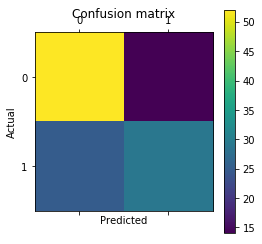

In [521]:
import pylab as plt
%matplotlib inline
plt.matshow(knncm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [522]:
from sklearn.metrics import classification_report

print(classification_report(bank_target_test, knnpreds_test))


             precision    recall  f1-score   support

         NO       0.68      0.79      0.73        66
        YES       0.67      0.54      0.60        54

avg / total       0.67      0.68      0.67       120



In [523]:
print knnclf.score(bank_test_norm, bank_target_test)


0.675


In [524]:
print knnclf.score(bank_train_norm, bank_target_train)

0.7708333333333334


In [ ]:
## Accuracy for k = 5, weight = distance
## test = 0.658, train = 1.0

## Accuracy for k = 5, weight = uniform
## test = 0.67, train = 0.783

## Accuracy for k = 10, weight = distance
## test = 0.65, train = 1.0

## Accuracy for k = 10, weight = uniform
## test = 0.692, train = 0.769

## Accuracy for k = 15, weight = distance
## test = 0.633, train = 1.0

## Accuracy for k = 15, weight = uniform
## test = 0.633, train = 0.735

## Accuracy for k = 20, weight = distance
## test = 0.625, train = 1.0

## Accuracy for k = 20, weight = uniform
## test = 0.683, train = 0.696

## based upon my various runs, it appears that using K = 10 and uniform distance provides the greates accuracy
## K = 9 and K = 11 both resulted in lower test accuracy

In [548]:
## 2.c

clf = tree.DecisionTreeClassifier()
clf = clf.fit(bank_train, bank_target_train)
treepreds_test = clf.predict(bank_test)
print treepreds_test

['NO' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO'
 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES'
 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO'
 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'YES' 'NO' 'YES'
 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO'
 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO'
 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO'
 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO']


In [549]:
print clf.score(bank_test, bank_target_test)

0.8083333333333333


In [550]:
print clf.score(bank_train, bank_target_train)

1.0


In [551]:
print(classification_report(bank_target_test, treepreds_test))

             precision    recall  f1-score   support

         NO       0.80      0.86      0.83        66
        YES       0.82      0.74      0.78        54

avg / total       0.81      0.81      0.81       120



In [553]:
treecm = confusion_matrix(bank_target_test, treepreds_test)
print treecm

[[57  9]
 [14 40]]


In [ ]:
## Bias-Variance Tradeoff

In [554]:
## naive Bayes

nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(bank_train, bank_target_train)
nbpreds_test = nbclf.predict(bank_test)
print nbpreds_test

['NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO'
 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES'
 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO'
 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'YES'
 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO'
 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO'
 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO']


In [556]:
print nbclf.score(bank_test, bank_target_test)

0.5916666666666667


In [557]:
print nbclf.score(bank_train, bank_target_train)

0.65625


In [560]:
print(classification_report(bank_target_test, nbpreds_test))

             precision    recall  f1-score   support

         NO       0.60      0.74      0.67        66
        YES       0.56      0.41      0.47        54

avg / total       0.59      0.59      0.58       120



In [558]:
nbcm = confusion_matrix(bank_target_test, nbpreds_test)
print nbcm

[[49 17]
 [32 22]]


In [ ]:
## Bias-Variance Tradeoff

In [561]:
## 2.d Observations

## Accuracy for kNN = 0.692
## Accuracy for Decision tree = 0.808
## Accuracy for Naive Bayes = 0.592

## For this data set, the decision tree performed better that the others, with default parameters. 
## It also processed more quickly compared to kNN.
## Ideally, we would want some programmatic method to determine which to use.
